In [17]:
from xen.models.VariationalAutoencoder import VariationalAutoEncoder
import tensorflow as tf

autoencoder = VariationalAutoEncoder(path="../models", name="mutopia_guitar_4-4")

# metadata = {
#     "timeSignature": "4/4",
#     "sequenceLength": 16
# }
# autoencoder.save("../models", "mutopia_guitar_16-4-4-500")




2023-05-02 21:31:38.784123: W tensorflow/c/c_api.cc:300] Operation '{name:'encoder_mean_2/kernel/Assign' id:1852 op device:{requested: '', assigned: ''} def:{{{node encoder_mean_2/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](encoder_mean_2/kernel, encoder_mean_2/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 912)]        0           []                               
                                                                                                  
 encoder_internal_0 (Dense)     (None, 149)          136037      ['encoder_input[0][0]']          
                                                                                                  
 encoder_internal_1 (Dense)     (None, 24)           3600        ['encoder_internal_0[0][0]']     
                                                                                                  
 encoder_mean (Dense)           (None, 4)            100         ['encoder_internal_1[0][0]']     
                                                                                        

2023-05-02 21:31:39.334050: W tensorflow/c/c_api.cc:300] Operation '{name:'decoder_output_11/bias/Assign' id:2045 op device:{requested: '', assigned: ''} def:{{{node decoder_output_11/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](decoder_output_11/bias, decoder_output_11/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [21]:
import yaml

metadata = {
    "timeSignature": "4/4",
    "sequenceLength": 16
    
}

# write metadata to yaml file
with open("../models/mutopia_guitar_4-4.yaml", 'w') as outfile:
    yaml.dump(metadata, outfile, default_flow_style=False)



(1, 912)


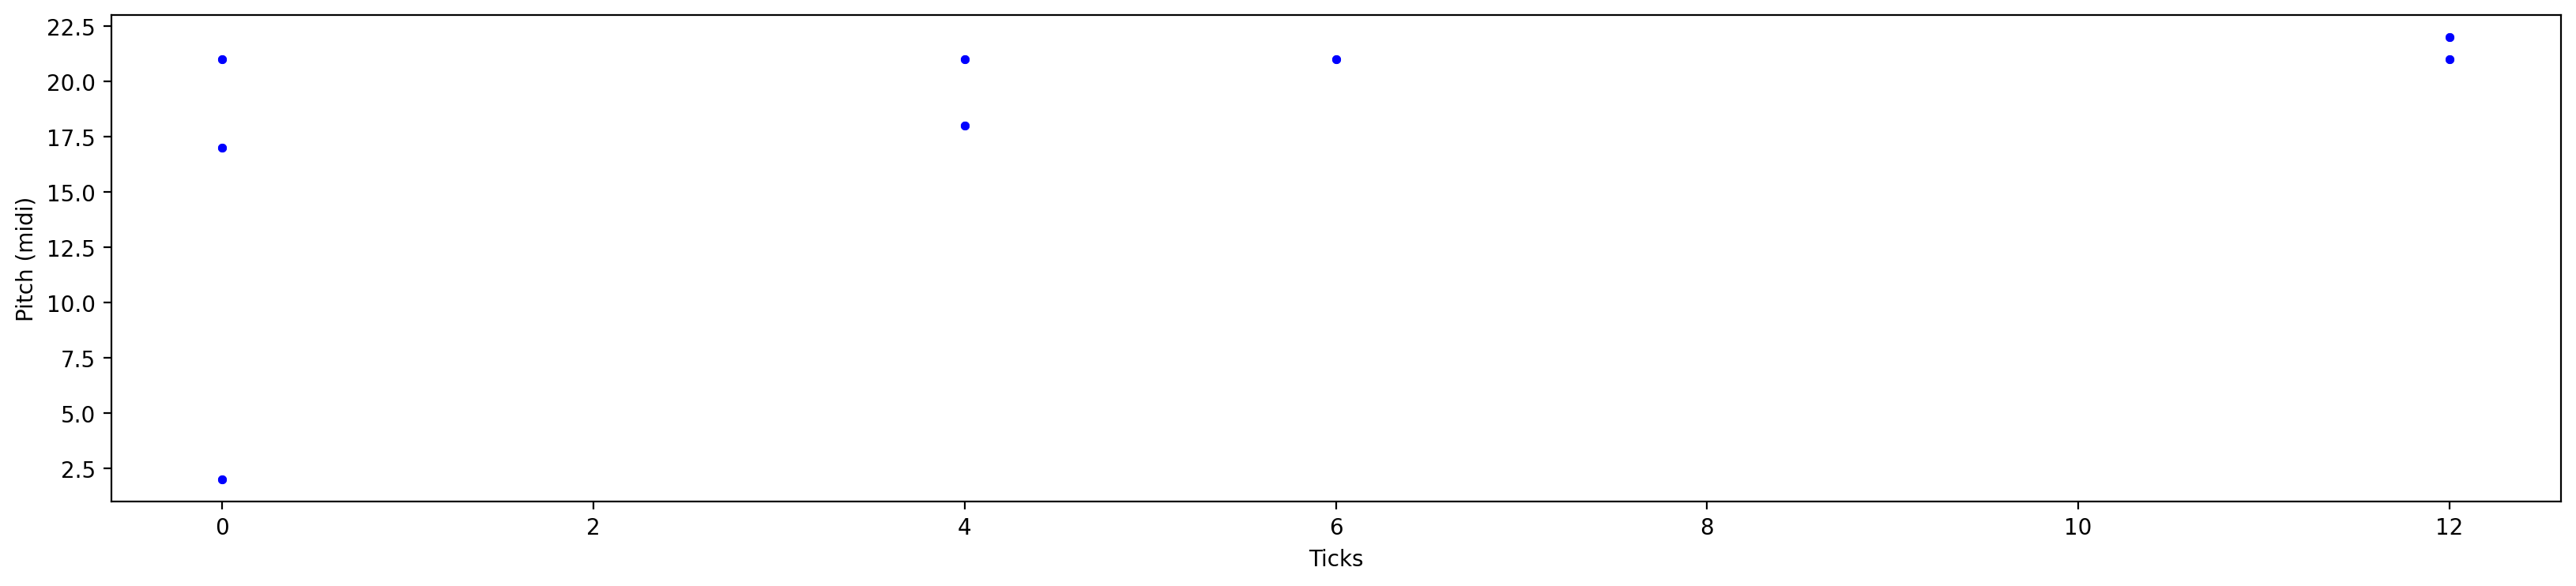

In [5]:
import numpy as np
from xen.data.codecs import SparseNoteSequenceCodec, FlatNoteSequenceCodec
from xen.visualise import plotPart, plotSparseNoteSequence

output = autoencoder.decode(np.array([[0, 0, 0, 0]]))
print(output.shape)

ticksPerQuarter = 4
quartersPerMeasure = 4
measuresPerSequence = 1
codec = FlatNoteSequenceCodec(ticksPerQuarter, quartersPerMeasure, measuresPerSequence, '4/4')

# TODO store min and max notes in metadata
codec.minNote = 0
codec.maxNote = 56
sequence = codec.decode(output)

plotSparseNoteSequence(sequence[0])


